<a href="https://colab.research.google.com/github/MlungisiN/Data-Science-With-Python/blob/master/03_Project_Acquire_and_Prepare_Data_from_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/DataScienceWithPython/blob/main/colab/starter/03 - Project - Acquire and Prepare Data from Web.ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project - Acquire and Prepare Data from Web

![Data Science Workflow](https://raw.githubusercontent.com/LearnPythonWithRune/DataScienceWithPython/main/jupyter/final/img/ds-workflow.png)

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieve the data ```tables = pd.read_html(url)```
- Assign the first DataFrame to a variable
    - HINT: ```tables``` is a list DataFrame containing all the data

#### Option 2: From csv file (if option 1 fails)
- Use ```pd.read_csv()``` to read the file `files/fundraising.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [57]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"
tables = pd.read_html(url)
data = tables[0]

In [58]:
data.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [59]:
data.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().any()```

In [60]:
data.isna().any()

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations
- You can delete it by 
    - ```del data['Source']```

In [61]:
del data['Source']
data.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


### Step 2.d: Convert Year column to numeric
- All the strings in years are formatted: 'YYYY/YYYY'
- To get the last year as string: ```data['Year'].str[-4:]```
- To convert that to numeric use: ```pd.to_numeric(...)```
    - HINT: You can assign the column directly

In [62]:
data['Year'] = data['Year'].str[:4]

In [63]:
data.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [64]:
data['Year'] = pd.to_numeric(data['Year'])
data.dtypes

Year             int64
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.e: Set Year to index
- To change a column to be the index use: ```data.set_index('Year', inplace=True)```
- Also sort the index in correct order: ```data.sort_index(inplace=True)```

In [65]:
data.set_index('Year', inplace=True)
data.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2021,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
2020,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2019,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2018,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
2017,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [66]:
data.sort_index(inplace=True)
data.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
2005,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
2006,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
2007,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


In [67]:
data['Revenue'] = pd.to_numeric(data['Revenue'].str[2:].str.replace(',', ''))

In [68]:
data.dtypes

Revenue          int64
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.f: Convert the remaining columns to numeric
- Remember the steps from the lesson
    - ```.str[2:]``` to remove the first two characters ('\$ ')
    - ```.str.replace(',', '')``` to remove commas
    - ```pd.to_numeric(...)``` converts string (containing well-formed number) to the numeric value
- Try to do it directly column by column

In [69]:
data['Expenses'] = pd.to_numeric(data['Expenses'].str[2:].str.replace(',', ''))
data['Asset rise'] = pd.to_numeric(data['Asset rise'].str[2:].str.replace(',', ''))
data['Total assets'] = pd.to_numeric(data['Total assets'].str[2:].str.replace(',', ''))

In [71]:
data.dtypes

Revenue         int64
Expenses        int64
Asset rise      int64
Total assets    int64
dtype: object

### Step 2.g: Visualize data to investigate quality
- Make a simple plot of **Revenue**, **Expenses** and **Total assets**
- This will help you spot any outliers

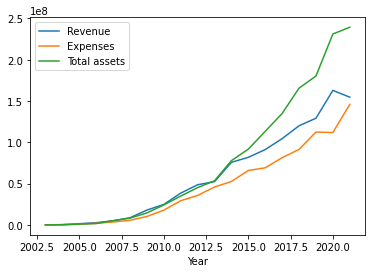

In [72]:
data[['Revenue', 'Expenses', 'Total assets']].plot()

### Step 2.h: Visualize data to investigate quality
- Make a simple plot of **Asset rise**
- This will help you spot any outliers

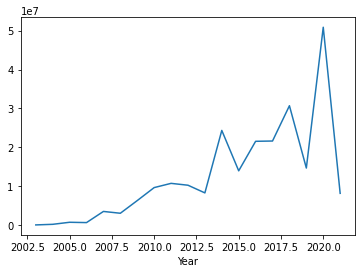

In [73]:
data['Asset rise'].plot()